In [1]:
import pandas as pd
A = pd.read_csv("C:/Users/Baccchi/Downloads/Cars93.csv")

In [2]:
A.head(2)

,Unnamed: 0,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend


In [3]:
Y = A[["Weight"]]

In [4]:
A.corr()[["Weight"]].sort_values(by="Weight")

,Weight
MPG.city,-0.843139
MPG.highway,-0.810658
Rev.per.mile,-0.735264
RPM,-0.427931
Unnamed: 0,-0.220525
Rear.seat.room,0.526250
Passengers,0.553273
Max.Price,0.605142
Luggage.room,0.637226
Price,0.647179


In [6]:
X = A[["Fuel.tank.capacity","Width","Wheelbase","EngineSize","Length","Turn.circle","MPG.city"]]

In [7]:
X.corr()

,Fuel.tank.capacity,Width,Wheelbase,EngineSize,Length,Turn.circle,MPG.city
Fuel.tank.capacity,1.000000,0.798719,0.757674,0.759306,0.690461,0.671343,-0.813144
Width,0.798719,1.000000,0.807213,0.867110,0.822148,0.817854,-0.720534
Wheelbase,0.757674,0.807213,1.000000,0.732484,0.823650,0.723324,-0.667108
EngineSize,0.759306,0.867110,0.732484,1.000000,0.780283,0.778464,-0.710003
Length,0.690461,0.822148,0.823650,0.780283,1.000000,0.738955,-0.666239
Turn.circle,0.671343,0.817854,0.723324,0.778464,0.738955,1.000000,-0.666389
MPG.city,-0.813144,-0.720534,-0.667108,-0.710003,-0.666239,-0.666389,1.000000


In [8]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=30)

C:\Users\Baccchi\anaconda3\envs\Machine_Learning_Class\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Baccchi\anaconda3\envs\Machine_Learning_Class\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

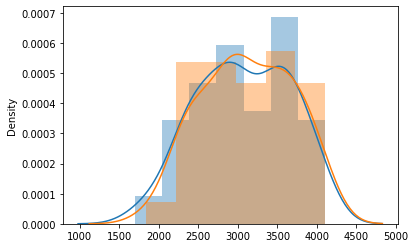

In [9]:
import seaborn as sb
sb.distplot(Y)
sb.distplot(ytrain)

# Ridge Regularization

In [10]:
from sklearn.linear_model import Ridge
rr = Ridge()
model = rr.fit(xtrain,ytrain)
pred = model.predict(xtest)
from sklearn.metrics import mean_absolute_error
mean_absolute_error(ytest,pred)

118.98164218700242

# Tuning Gird

In [15]:
tuning_grid = []
q = 0.999
for i in range(0,100,1):
    tuning_grid.append(q-0.0001)
    q = q-0.001

In [16]:
q = 0
for i in range(0,100,1):
    tuning_grid.append(q+0.0001)
    q = q+0.001

In [23]:
tuning_grid

[0.9989,
 0.9979,
 0.9969,
 0.9959,
 0.9949,
 0.9939,
 0.9929,
 0.9919,
 0.9909,
 0.9899,
 0.9889,
 0.9879,
 0.9869,
 0.9859,
 0.9849,
 0.9839,
 0.9829,
 0.9819,
 0.9809,
 0.9799,
 0.9789,
 0.9779,
 0.9769,
 0.9759,
 0.9749,
 0.9739,
 0.9729,
 0.9719,
 0.9709,
 0.9699,
 0.9689,
 0.9679,
 0.9669,
 0.9659,
 0.9649,
 0.9639,
 0.9629,
 0.9619,
 0.9609,
 0.9599,
 0.9589,
 0.9579,
 0.9569,
 0.9559,
 0.9549,
 0.9539,
 0.9529,
 0.9519,
 0.9509,
 0.9499,
 0.9489,
 0.9479,
 0.9469,
 0.9459,
 0.9449,
 0.9439,
 0.9429,
 0.9419,
 0.9409,
 0.9399,
 0.9389,
 0.9379,
 0.9369,
 0.9359,
 0.9349,
 0.9339,
 0.9329,
 0.9319,
 0.9309,
 0.9299,
 0.9289,
 0.9279,
 0.9269,
 0.9259,
 0.9248999999999999,
 0.9238999999999999,
 0.9228999999999999,
 0.9218999999999999,
 0.9208999999999999,
 0.9198999999999999,
 0.9188999999999999,
 0.9178999999999999,
 0.9168999999999999,
 0.9158999999999999,
 0.9148999999999999,
 0.9138999999999999,
 0.9128999999999999,
 0.9118999999999999,
 0.9108999999999999,
 0.9098999999999999

# Find Alpha Value

In [18]:
from sklearn.model_selection import GridSearchCV
rr = Ridge()
tp = {"alpha":tuning_grid}
cv = GridSearchCV(rr,tp,scoring="neg_mean_absolute_error")
cvmodel = cv.fit(X,Y)
cvmodel.best_params_

{'alpha': 0.9989}

In [19]:
from sklearn.linear_model import Ridge
rr = Ridge(alpha=0.9989)
model = rr.fit(xtrain,ytrain)
pred = model.predict(xtest)
from sklearn.metrics import mean_absolute_error
mean_absolute_error(ytest,pred)

118.98113627870414

# Lasso Regularization

In [24]:
#Alpha Value
from sklearn.linear_model import Lasso
lso = Lasso()
tp = {"alpha":tuning_grid}
cv = GridSearchCV(rr,tp,scoring="neg_mean_absolute_error")
cvmodel = cv.fit(X,Y)
cvmodel.best_params_

{'alpha': 0.9989}

In [21]:
from sklearn.linear_model import Lasso
lso = Lasso()
model = lso.fit(xtrain,ytrain)
pred = model.predict(xtest)
from sklearn.metrics import mean_absolute_error
mean_absolute_error(ytest,pred)

119.25193531680833

In [22]:
from sklearn.linear_model import Lasso
lso = Lasso(alpha=0.9989)
model = lso.fit(xtrain,ytrain)
pred = model.predict(xtest)
from sklearn.metrics import mean_absolute_error
mean_absolute_error(ytest,pred)

119.25109468957383